In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# The array x_t will contain all result of X(t) in range  0<= t <=1500
x_t = np.zeros(1506)
x_t[0]=1.5


# The function to calculate the result of x(t)
def Mackey_Glass(t_1):
  t = t_1 - 1
  if t-25<0:
     xt_25 = 0
  else:
     xt_25 = x_t[t-25]


  return ((x_t[t]) + ((0.2 * xt_25)/(1+ xt_25**10)) - (0.1 *x_t[t]))


# storing the result of X(t) in x_t
for i in range(1,1506):
  x_t[i] = Mackey_Glass(i)



inputs = np.zeros((1200, 5))   #shape is [1200,5]
outputs = np.zeros((1200, 1))  #shape is [1200,1]


#Generating the inputs and the outputs according to the lab instructions
#t satrts at 301 until it is 1500
t = 301
for i in range(1200):
  inputs[i][0] =  x_t[t-20]
  inputs[i][1] =  x_t[t-15]
  inputs[i][2] =  x_t[t-10]
  inputs[i][3] =  x_t[t-5]
  inputs[i][4] =  x_t[t]
  outputs[i][0] = x_t[t+5]
  t +=1

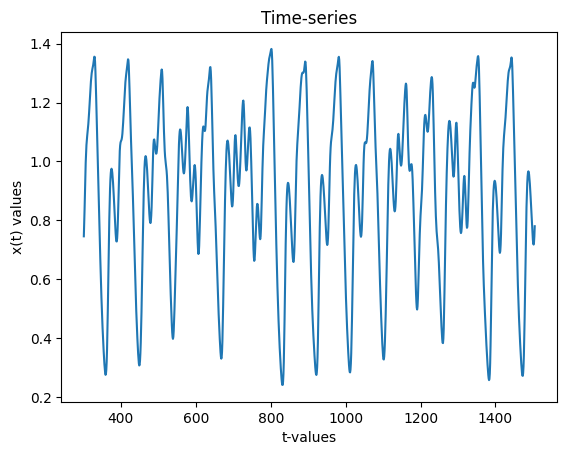

In [7]:
t = np.arange(start=301, stop=1506, dtype=int)
plt.plot(t, x_t[301:1506])
plt.xlabel("t-values")
plt.ylabel("x(t) values")
plt.title("Time-series")
plt.show()

In [8]:
# We divide the data into three subsets, trainning, validaion, and test
x = np.split(inputs, [800,1000])
y = np.split(outputs, [800,1000])

x_train = np.array(x[0])           #800 (shape [800,5])
x_validation = np.array(x[1])      #200
x_test = np.array(x[2])            #200

y_train = np.array(y[0]).flatten()
y_validation = np.array(y[1]).flatten()
y_test = np.array(y[2]).flatten()

In [9]:
#Building the network using tensorflow

class neural_network:

   #n_layer is array that contain informatin about layers; number of nodes and the activation function in each layer
   def __init__(self, learning_rate, n_layer, epochs, loss, inputs, outputs):
    self.learning_rate = learning_rate
    self.n_layer = n_layer
    self.model=tf.keras.Sequential()
    self.epochs = epochs
    self.loss = loss
    self.inputs= inputs
    self.outputs = outputs



   def createlayers(self):
      # Same input layer
     self.model.add(tf.keras.Input(shape=(5,)))

      #Here we add the hidden layers
     for layer in self.n_layer:
       self.model.add(tf.keras.layers.Dense(layer[0] , activation=layer[1]))
      # same output layer
     self.model.add(tf.keras.layers.Dense(1 , activation="linear"))

   def train(self):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss') #Implenetaion of ealy stopping
    SGD = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)       #
    self.model.compile(loss=self.loss, optimizer =SGD)
    temp =self.model.fit(self.inputs,
                   self.outputs,
                   epochs = self.epochs,
                   validation_data=(x_validation, y_validation),
                   callbacks=[early_stopping],
                   shuffle=False)
    return round(temp.history.get("val_loss")[-1],  4)


   def predict(self, x_test):
    return self.model.predict(x_test)

   def evaluate(self,x_test, y_test):
       return self.model.evaluate(x_test, y_test)


In [5]:
nh1 = np.array([3,4,5])
nh2 = np.array([2,4,6])
val_losses = []
iterations = 10
for x in nh1:
  for y in nh2:
      val_loss = 0
      for i in range(iterations):

        my_neural_network =  neural_network(n_layer=[[x, "sigmoid"],[y, "sigmoid"]],
                                     epochs=100,
                                      loss="mse",
                                      inputs=x_train,
                                      outputs=y_train,
                                      learning_rate=0.4
                                    )
        my_neural_network.createlayers()
        val_loss += my_neural_network.train()
      val_losses.append(round((val_loss/iterations),4))



def get_layer(index):
   i=0
   j=0
   if index == 0:
     i=0
     j=0
   elif index == 1:
     i=0
     j=1
   elif index == 2:
     i=0
     j=2
   elif index ==3:
     i=1
     j=0
   elif index ==4:
     i=1
     j=1
   elif index ==5:
     i=1
     j=2
   elif index ==6:
     i=2
     j=0
   elif index ==7:
     i=2
     j=1
   else:
     i=2
     j=2

   return i, j




print(val_losses)
val_losses = np.array(val_losses)
max_index = val_losses.argmax()
min_index = val_losses.argmin()
i_max, j_max = get_layer(max_index)
i_min, j_min = get_layer(min_index)

print("The best " + str(nh1[i_min]) + " " + str(nh2[j_min]))
print("The worst " + str(nh1[i_max]) + " " + str(nh2[j_max]))



Streaming output truncated to the last 5000 lines.
25/25 [==============================] - 0s 5ms/step - loss: 0.0291 - val_loss: 0.0259
Epoch 33/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.0253
Epoch 34/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.0248
Epoch 35/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.0244
Epoch 36/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.0240
Epoch 37/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.0236
Epoch 38/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.0232
Epoch 39/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.0229
Epoch 40/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0272 - val_loss: 0.0226
Epoch 41/100
25/25 [==============================] - 0s 4ms/s

In [16]:
#task 2.3
best_network =  neural_network(n_layer=[[3, "sigmoid"],[6, "sigmoid"]],
                                     epochs=100,
                                      loss="mse",
                                      inputs=x_train,
                                      outputs=y_train,
                                      learning_rate=0.4
                                    )
best_network.createlayers()
best_network.train()
print("The best")
best_network.evaluate(x_test,y_test)
best_prediction= best_network.predict(x_test)




worst_network =  neural_network(n_layer=[[5, "sigmoid"],[2, "sigmoid"]],
                                     epochs=100,
                                      loss="mse",
                                      inputs=x_train,
                                      outputs=y_train,
                                      learning_rate=0.4
                                    )
worst_network.createlayers()
worst_network.train()
print("The worst")
worst_network.evaluate(x_test,y_test)
worst_prediction= worst_network.predict(x_test)


Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.6929 - val_loss: 0.1555
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2249 - val_loss: 0.1205
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2017 - val_loss: 0.1040
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1878 - val_loss: 0.0946
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1783 - val_loss: 0.0887
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1712 - val_loss: 0.0845
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1654 - val_loss: 0.0814
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1603 - val_loss: 0.0787
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1555 - val_loss: 0.0763
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1505 - val_loss: 0.0738
Epoch 11/

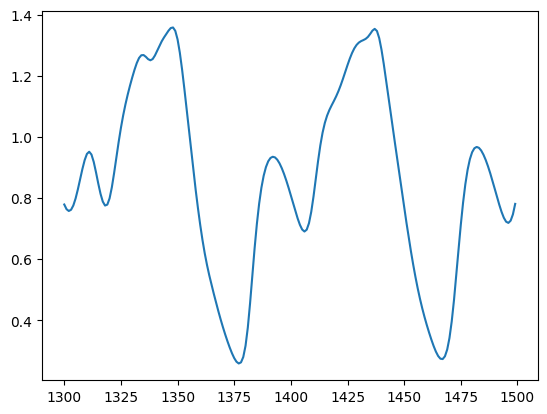

In [31]:
#The reel target
t = np.arange(start=1300, stop=1500, dtype=int)
plt.plot(t, outputs[1000:1200])
plt.show()

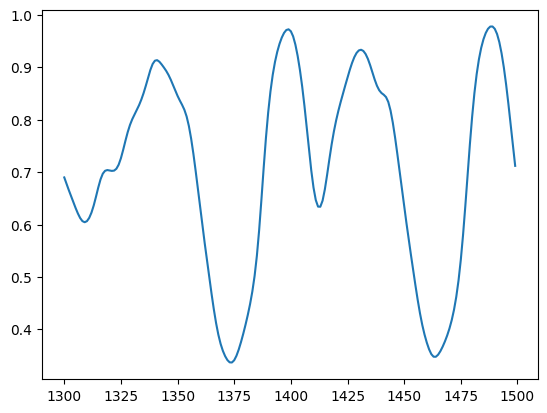

In [32]:
#The best predictions
t = np.arange(start=1300, stop=1500, dtype=int)
plt.plot(t,best_prediction.flatten())
plt.show()


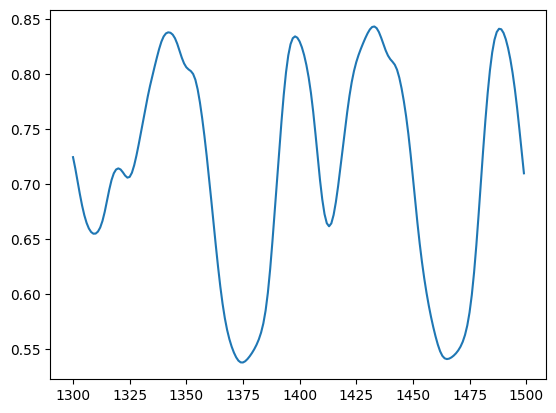

In [33]:
#The worst predictions
t = np.arange(start=1300, stop=1500, dtype=int)
plt.plot(t, worst_prediction.flatten())
plt.show()